In [1]:
import os
os.chdir(r"C:\Users\colli\OneDrive\Documents\Stock Market Project")
import pandas as pd
import time
import numpy as np
from datetime import timedelta, date

In [8]:
#Federal Reserve Data
#Timeframe: Monthly 01/01/1980 to 12/31/2022
df_FedFund = pd.read_csv(r'C:\Users\colli\OneDrive\Documents\Stock Market Project\FEDFUNDS.csv')
print(df_FedFund)

#Put To Call Ratio Data
#TimeFrame: Daily 11/1/2006 to 10/04/2019
df_PutCall = pd.read_csv(r'C:\Users\colli\OneDrive\Documents\Stock Market Project\totalpc.csv')
print(df_PutCall)

#Vix Data 
#Timeframe: Daily Data 01/02/1990 to 01/26/2023
df_Vixcurrent = pd.read_csv(r'C:\Users\colli\OneDrive\Documents\Stock Market Project\VIX_History1990toCurrent.csv')
print(df_Vixcurrent)

#Get only needed columns from vix
df_Vixcurrent = df_Vixcurrent.rename(columns={'DATE': 'VIXDate', 'CLOSE': 'VIXClose'})
print(df_Vixcurrent)
df_Vixcurrent = df_Vixcurrent.drop(['OPEN','HIGH','LOW'], axis=1)

#S&P 500 Data
#TimeFrame: Weekly 01/06/1980 to 01/01/2023
df_SP500 = pd.read_csv(r'C:\Users\colli\OneDrive\Documents\Stock Market Project\^spx_w.csv')
print(df_SP500)

#Consumer Sentiment Data
#Timeframe: Weekly 06/26/1987
df_Sentiment = pd.read_excel(r'C:\Users\colli\OneDrive\Documents\Stock Market Project\sentiment-Edited.xlsx')
print(df_Sentiment)

           DATE  FEDFUNDS
0    1980-01-01     13.82
1    1980-02-01     14.13
2    1980-03-01     17.19
3    1980-04-01     17.61
4    1980-05-01     10.98
..          ...       ...
511  2022-08-01      2.33
512  2022-09-01      2.56
513  2022-10-01      3.08
514  2022-11-01      3.78
515  2022-12-01      4.10

[516 rows x 2 columns]
     Volume and Put/Call Ratio data is compiled for the convenience of site visitors and is furnished without responsibility for accuracy and is accepted by the site visitor on the condition that transmission or omissions shall not be made the basis for any claim demand or cause for action.  Historical index volume from November 1 2006 through May 31 2012 is based on cleared volume as reported by the OCC. The volume data reflected after May 31 2012 below is based upon preliminary reported volume rather than cleared volume. The information and data was obtained from sources believed to be reliable but accuracy is not guaranteed. Your use of Cboe Volume and 

     Reported Date   Bullish   Neutral   Bearish   Mov Avg  \
0       1987-07-24  0.360000  0.500000  0.140000       NaN   
1       1987-07-31  0.260000  0.480000  0.260000       NaN   
2       1987-08-07  0.560000  0.150000  0.290000       NaN   
3       1987-08-14  0.450000  0.350000  0.200000       NaN   
4       1987-08-21  0.660000  0.280000  0.060000       NaN   
...            ...       ...       ...       ...       ...   
1783    2022-11-25  0.288630  0.309038  0.402332  0.258224   
1784    2022-12-02  0.244681  0.351064  0.404255  0.257471   
1785    2022-12-09  0.247273  0.334545  0.418182  0.256935   
1786    2022-12-16  0.243028  0.310757  0.446215  0.253644   
1787    2022-12-23  0.265000  0.259000  0.476000  0.250668   

      Bull to Bear Spread  
0                0.220000  
1                0.000000  
2                0.270000  
3                0.250000  
4                0.600000  
...                   ...  
1783            -0.113702  
1784            -0.159574  
178

In [3]:
#Keeping only necessary columns from S&P data
FinalDB = df_SP500[['Date','Close','Volume']]
print(FinalDB)
#Keeping only necessary rows from S&P data
FinalDB = FinalDB[FinalDB.Date.between('1990-01-01', '2022-12-31')]

            Date    Close        Volume
0     1980-01-06   106.52  8.986111e+07
1     1980-01-13   109.92  1.511222e+08
2     1980-01-20   111.07  1.523722e+08
3     1980-01-27   113.61  1.419778e+08
4     1980-02-03   115.12  1.515444e+08
...          ...      ...           ...
2239  2022-12-04  4071.70  1.211891e+10
2240  2022-12-11  3934.38  1.118444e+10
2241  2022-12-18  3852.36  1.568683e+10
2242  2022-12-25  3844.82  1.029402e+10
2243  2023-01-01  3839.50  6.587871e+09

[2244 rows x 3 columns]


In [4]:
#Checking datatypes for join & converting dates to date data type
FinalDB.dtypes
df_Vixcurrent.dtypes
FinalDB['Date'] = pd.to_datetime(FinalDB['Date'])
df_Vixcurrent['VIXDate'] = pd.to_datetime(df_Vixcurrent['VIXDate'])
#adding two days to match data to have sundays value to join with S&P which only has Sundays
df_Vixcurrent['VIXDate'] = df_Vixcurrent['VIXDate'] + timedelta(days=2)

In [5]:
#Joining DB's
FinalDB2 = pd.merge(FinalDB,df_Vixcurrent,left_on='Date',right_on='VIXDate')
print(FinalDB2)

           Date    Close        Volume    VIXDate  VIXClose
0    1990-01-07   352.20  3.832944e+08 1990-01-07     20.11
1    1990-01-14   339.93  4.497667e+08 1990-01-14     24.64
2    1990-01-21   339.15  4.785056e+08 1990-01-21     22.50
3    1990-01-28   325.80  5.033167e+08 1990-01-28     26.28
4    1990-02-04   330.92  4.696889e+08 1990-02-04     24.32
...         ...      ...           ...        ...       ...
1655 2022-11-27  4026.12  6.766748e+09 2022-11-27     20.50
1656 2022-12-04  4071.70  1.211891e+10 2022-12-04     19.06
1657 2022-12-11  3934.38  1.118444e+10 2022-12-11     22.83
1658 2022-12-18  3852.36  1.568683e+10 2022-12-18     22.62
1659 2022-12-25  3844.82  1.029402e+10 2022-12-25     20.87

[1660 rows x 5 columns]


In [6]:
#Getting Year and month column to use to join to Fedrate monthly data
DF_Year_Month = {'Year':[],'Month': []}
DF_Year_Month = pd.DataFrame(DF_Year_Month)
print(DF_Year_Month)
FinalDB2 = FinalDB2.append(DF_Year_Month)
FinalDB2['Year'] = pd.DatetimeIndex(FinalDB2['Date']).year
FinalDB2['Month'] = pd.DatetimeIndex(FinalDB2['Date']).month
FinalDB2["YearMonth"] = FinalDB2['Year'].astype(str) +"-"+ FinalDB2["Month"].astype(str)


Empty DataFrame
Columns: [Year, Month]
Index: []


In [9]:
#Adding month and year column to fedFund to use for join
df_FedFund = df_FedFund.append(DF_Year_Month)
df_FedFund['Year'] = pd.DatetimeIndex(df_FedFund['DATE']).year
df_FedFund['Month'] = pd.DatetimeIndex(df_FedFund['DATE']).month
df_FedFund["YearMonth"] = df_FedFund['Year'].astype(str) +"-"+ df_FedFund["Month"].astype(str)
df_FedFund = df_FedFund[['FEDFUNDS', 'YearMonth']]


In [10]:
#Join FedFund to finalDB
FinalDB3 = pd.merge(FinalDB2,df_FedFund,on='YearMonth')
print(FinalDB3)

#Drop unnecessary columns
FinalDB3 = FinalDB3.drop(['Year','Month','YearMonth','VIXDate'], axis=1)
FinalDB3 = FinalDB3.rename(columns = {'Close':'SP500_Price'})


           Date    Close        Volume    VIXDate  VIXClose  Year  Month  \
0    1990-01-07   352.20  3.832944e+08 1990-01-07     20.11  1990      1   
1    1990-01-14   339.93  4.497667e+08 1990-01-14     24.64  1990      1   
2    1990-01-21   339.15  4.785056e+08 1990-01-21     22.50  1990      1   
3    1990-01-28   325.80  5.033167e+08 1990-01-28     26.28  1990      1   
4    1990-02-04   330.92  4.696889e+08 1990-02-04     24.32  1990      2   
...         ...      ...           ...        ...       ...   ...    ...   
1655 2022-11-27  4026.12  6.766748e+09 2022-11-27     20.50  2022     11   
1656 2022-12-04  4071.70  1.211891e+10 2022-12-04     19.06  2022     12   
1657 2022-12-11  3934.38  1.118444e+10 2022-12-11     22.83  2022     12   
1658 2022-12-18  3852.36  1.568683e+10 2022-12-18     22.62  2022     12   
1659 2022-12-25  3844.82  1.029402e+10 2022-12-25     20.87  2022     12   

     YearMonth  FEDFUNDS  
0       1990-1      8.23  
1       1990-1      8.23  
2     

In [11]:
#Join Consumer Sentiment to Final DB
df_Sentiment = df_Sentiment.rename(columns = {'Reported Date':'Date'})
df_Sentiment = df_Sentiment[df_Sentiment.Date.between('1990-01-01', '2022-12-31')]
df_Sentiment['Date'] = df_Sentiment['Date'] + timedelta(days=2)
FinalDB4 = pd.merge(FinalDB3,df_Sentiment,on='Date')
FinalDB4.tail(50)
len(FinalDB4)
StockMarketDF = FinalDB4

In [12]:
#importing packages for EDA
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

#Basic Dataframe Info
StockMarketDF.head()
StockMarketDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 0 to 1659
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1660 non-null   datetime64[ns]
 1   SP500_Price          1660 non-null   float64       
 2   Volume               1660 non-null   float64       
 3   VIXClose             1660 non-null   float64       
 4   FEDFUNDS             1660 non-null   float64       
 5   Bullish              1659 non-null   float64       
 6   Neutral              1659 non-null   float64       
 7   Bearish              1659 non-null   float64       
 8   Mov Avg              1652 non-null   float64       
 9   Bull to Bear Spread  1659 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 142.7 KB


In [13]:
#Checking Null values and filling with mean, 12 NA values between all columns
StockMarketDF[StockMarketDF['Bullish'].isnull()]
StockMarketDF[StockMarketDF['Mov Avg'].isnull()]
StockMarketDF = StockMarketDF.fillna(StockMarketDF.mean())


<ipython-input-13-db249a7aaa97>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  StockMarketDF = StockMarketDF.fillna(StockMarketDF.mean())


In [14]:
StockMarketDF.describe()

,SP500_Price,Volume,VIXClose,FEDFUNDS,Bullish,Neutral,Bearish,Mov Avg,Bull to Bear Spread
count,1660.000000,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000
mean,1502.933163,6.484254e+09,19.469253,2.710265,0.380393,0.306412,0.313194,0.380737,0.067199
std,995.953637,4.911285e+09,8.037720,2.364964,0.099623,0.076733,0.098527,0.076858,0.182692
min,300.030000,1.943667e+08,9.140000,0.050000,0.120000,0.076900,0.066700,0.175000,-0.540000
25%,882.092500,1.675208e+09,13.707500,0.190000,0.307925,0.250000,0.241227,0.325748,-0.051590
50%,1253.140000,6.234353e+09,17.505000,2.130000,0.376579,0.309245,0.300000,0.379716,0.075788
75%,1949.920000,1.036319e+10,23.010000,5.210000,0.441480,0.360000,0.376775,0.431109,0.190000
max,4766.180000,2.591171e+10,79.130000,8.290000,0.750000,0.528600,0.702700,0.644650,0.628600


,SP500_Price,Volume,VIXClose,FEDFUNDS,Bullish,Neutral,Bearish,Mov Avg,Bull to Bear Spread
SP500_Price,1.000000,0.594427,-0.007701,-0.493535,-0.140400,0.035846,0.114050,-0.140340,-0.138069
Volume,0.594427,1.000000,0.316051,-0.716524,-0.177858,-0.256538,0.379629,-0.190444,-0.301723
VIXClose,-0.007701,0.316051,1.000000,-0.068436,-0.163516,-0.290844,0.391820,-0.135100,-0.300477
FEDFUNDS,-0.493535,-0.716524,-0.068436,1.000000,0.067024,0.055885,-0.111266,0.072753,0.096555
Bullish,-0.140400,-0.177858,-0.163516,0.067024,1.000000,-0.399331,-0.700114,0.717032,0.922883
Neutral,0.035846,-0.256538,-0.290844,0.055885,-0.399331,1.000000,-0.375051,-0.274775,-0.015492
Bearish,0.114050,0.379629,0.391820,-0.111266,-0.700114,-0.375051,1.000000,-0.511011,-0.921083
Mov Avg,-0.140340,-0.190444,-0.135100,0.072753,0.717032,-0.274775,-0.511011,1.000000,0.666594
Bull to Bear Spread,-0.138069,-0.301723,-0.300477,0.096555,0.922883,-0.015492,-0.921083,0.666594,1.000000


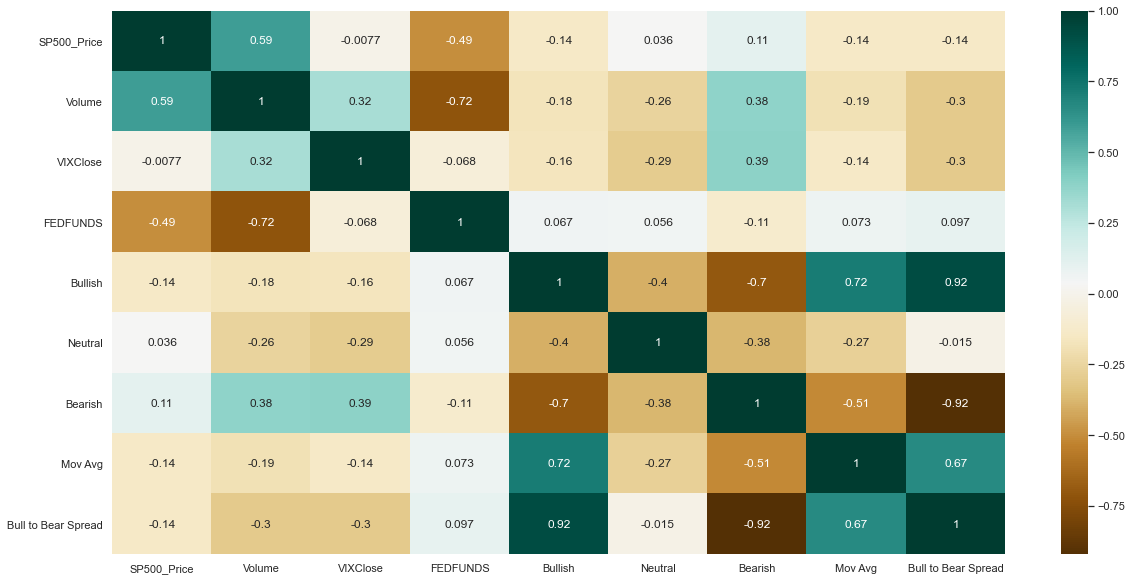

In [15]:
#Confusion Matrix
plt.figure(figsize=(20,10))
corr= StockMarketDF.corr()
sns.heatmap(corr,cmap='BrBG',annot=True)
corr

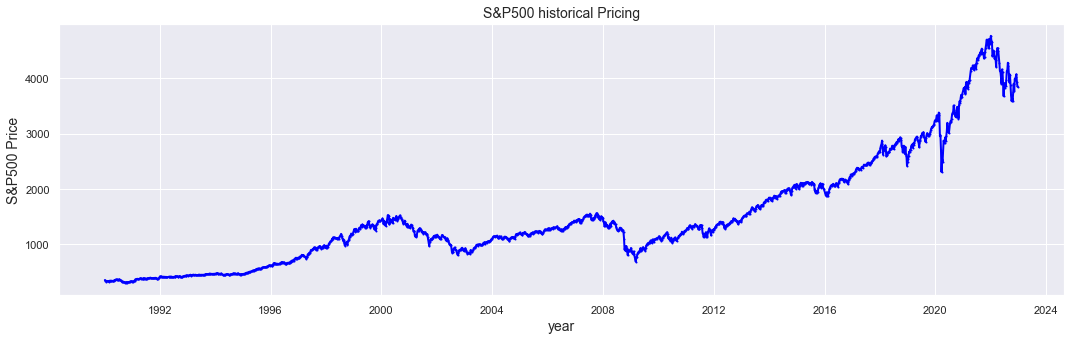

In [41]:
#plot dependent variable
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(StockMarketDF['Date'], StockMarketDF['SP500_Price'], color='blue', marker='o', linewidth=2, markersize=1)
plt.title('S&P500 historical Pricing', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('S&P500 Price', fontsize=14)
plt.grid(True)
plt.show()


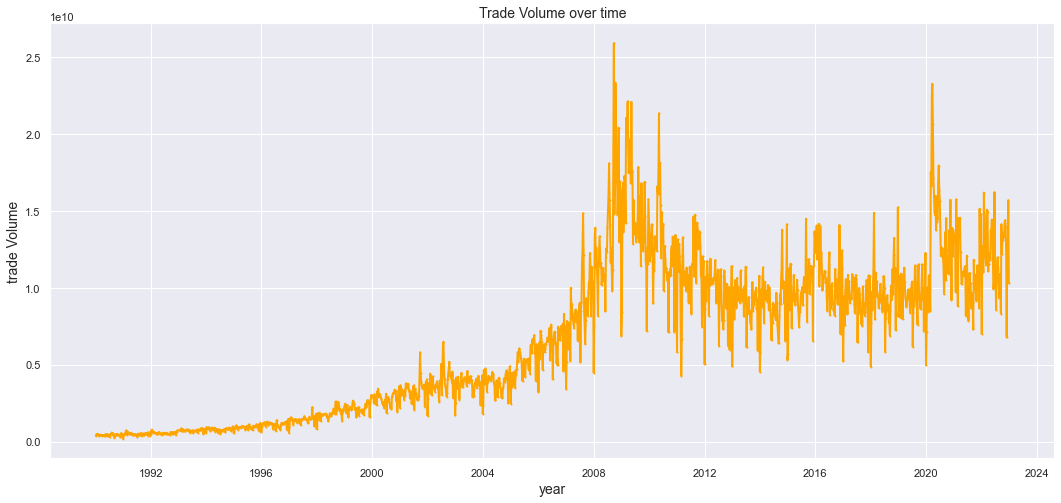

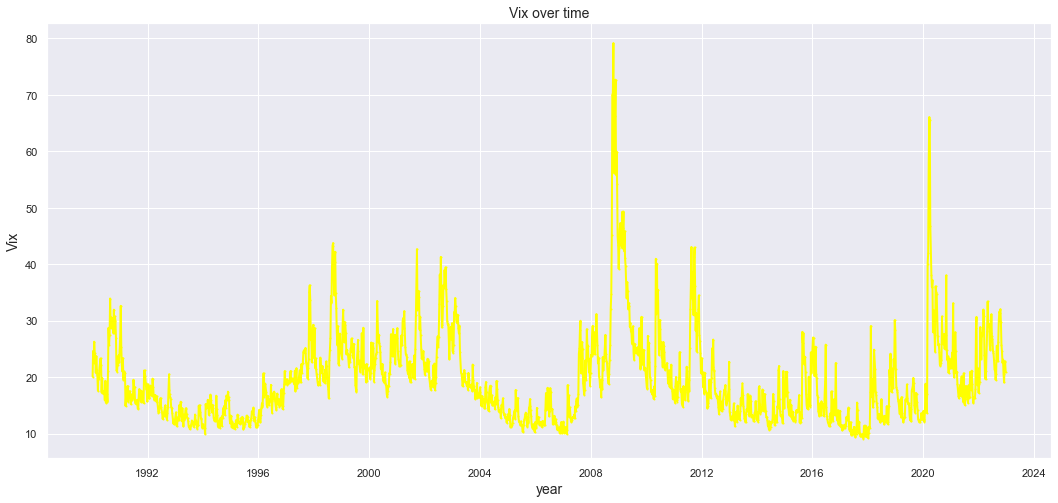

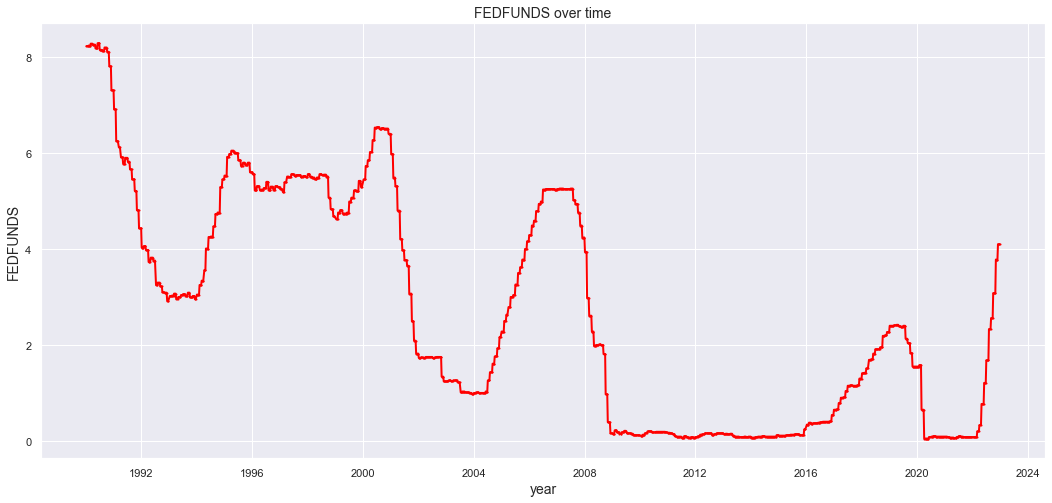

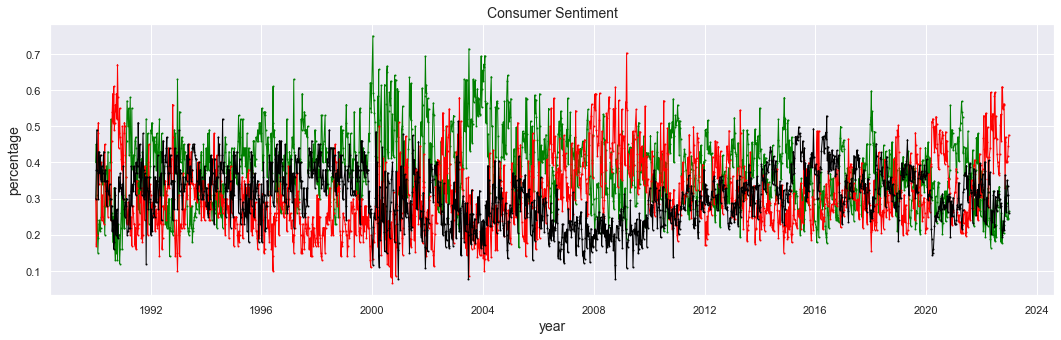

In [40]:
#plot independent variables
#Volume
plt.plot(StockMarketDF['Date'], StockMarketDF['Volume'], color='orange', marker='o', linewidth=2, markersize=1)
plt.title('Trade Volume over time', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('trade Volume', fontsize=14)
plt.grid(True)
plt.show()

#VixClose
plt.rcParams["figure.figsize"] = (18,8)
plt.plot(StockMarketDF['Date'], StockMarketDF['VIXClose'], color='yellow', marker='o', linewidth=2, markersize=1)
plt.title('Vix over time', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('Vix', fontsize=14)
plt.grid(True)
plt.show()

#FedFunds
plt.rcParams["figure.figsize"] = (18,8)
plt.plot(StockMarketDF['Date'], StockMarketDF['FEDFUNDS'], color='red', marker='o', linewidth=2, markersize=1)
plt.title('FEDFUNDS over time', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('FEDFUNDS', fontsize=14)
plt.grid(True)
plt.show()

#FedFunds
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(StockMarketDF['Date'], StockMarketDF['Bullish'], color='green', marker='o', linewidth=1, markersize=1)
plt.plot(StockMarketDF['Date'], StockMarketDF['Bearish'], color='red', marker='o', linewidth=1, markersize=1)
plt.plot(StockMarketDF['Date'], StockMarketDF['Neutral'], color='Black', marker='o', linewidth=1, markersize=1)
plt.title('Consumer Sentiment', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('percentage', fontsize=14)
plt.grid(True)
plt.show()



In [44]:
#Highest Volatility was just before housing market crash, and begninning of pandemic
StockMarketDF.loc[StockMarketDF['VIXClose'] > 60]

,Date,SP500_Price,Volume,VIXClose,FEDFUNDS,Bullish,Neutral,Bearish,Mov Avg,Bull to Bear Spread
944,2008-10-12,899.22,2.334266e+10,69.95,0.97,0.314700,0.076900,0.608400,0.326425,-0.293700
945,2008-10-19,940.55,2.029665e+10,70.33,0.97,0.409400,0.193000,0.397700,0.329975,0.011700
946,2008-10-26,876.77,1.676967e+10,79.13,0.97,0.387400,0.225200,0.387400,0.340050,0.000000
949,2008-11-16,873.29,1.614704e+10,66.31,0.39,0.383300,0.191700,0.425000,0.373525,-0.041700
950,2008-11-23,800.03,2.041400e+10,72.67,0.39,0.243700,0.184900,0.571400,0.361438,-0.327700
1522,2020-03-22,2304.92,2.327068e+10,66.04,0.65,0.343511,0.145038,0.511450,0.351256,-0.167939
1523,2020-03-29,2541.47,2.065705e+10,65.54,0.65,0.329016,0.150259,0.520725,0.352411,-0.191709


In [46]:
#Returning all rows where federal Funds greater than 4
StockMarketDF.loc[(StockMarketDF['FEDFUNDS'] > 4) & (StockMarketDF['Date'] > '1999-12-31')]

,Date,SP500_Price,Volume,VIXClose,FEDFUNDS,Bullish,Neutral,Bearish,Mov Avg,Bull to Bear Spread
500,2000-01-09,1441.47,2.968778e+09,21.72,5.45,0.750000,0.116600,0.133300,0.590000,0.616700
501,2000-01-16,1465.15,2.872056e+09,19.66,5.45,0.592600,0.222200,0.185200,0.612100,0.407400
502,2000-01-23,1441.36,2.475000e+09,20.82,5.45,0.571400,0.250000,0.178600,0.615667,0.392800
503,2000-01-30,1360.16,3.073389e+09,26.14,5.45,0.537000,0.259300,0.203700,0.601833,0.333300
504,2000-02-06,1424.37,2.891667e+09,21.54,5.73,0.511100,0.244400,0.244400,0.583683,0.266700
...,...,...,...,...,...,...,...,...,...,...
905,2007-12-30,1478.49,4.480111e+09,20.74,4.24,0.300000,0.200000,0.500000,0.346837,-0.200000
1656,2022-12-04,4071.70,1.211891e+10,19.06,4.10,0.244681,0.351064,0.404255,0.257471,-0.159574
1657,2022-12-11,3934.38,1.118444e+10,22.83,4.10,0.247273,0.334545,0.418182,0.256935,-0.170909
1658,2022-12-18,3852.36,1.568683e+10,22.62,4.10,0.243028,0.310757,0.446215,0.253644,-0.203187


In [47]:
#Periods of lowest consumer sentiment, 2022 has some of the lowest weeks
StockMarketDF.loc[StockMarketDF['Bull to Bear Spread'] < -.3]

,Date,SP500_Price,Volume,VIXClose,FEDFUNDS,Bullish,Neutral,Bearish,Mov Avg,Bull to Bear Spread
4,1990-02-04,330.92,4.696889e+08,24.32,8.24,0.150000,0.370000,0.480000,0.335000,-0.330000
5,1990-02-11,333.62,4.304889e+08,23.69,8.24,0.190000,0.300000,0.510000,0.306250,-0.320000
31,1990-08-19,327.83,4.118111e+08,27.53,8.13,0.180000,0.230000,0.590000,0.325000,-0.410000
33,1990-09-02,322.56,3.552333e+08,29.90,8.20,0.230000,0.160000,0.610000,0.311250,-0.380000
35,1990-09-16,316.83,3.442333e+08,30.56,8.20,0.160000,0.330000,0.510000,0.272500,-0.350000
36,1990-09-23,311.32,4.141167e+08,30.04,8.20,0.130000,0.310000,0.560000,0.223750,-0.430000
38,1990-10-07,311.50,4.582500e+08,27.85,8.11,0.150000,0.260000,0.590000,0.211250,-0.440000
39,1990-10-14,300.03,4.345944e+08,31.94,8.11,0.210000,0.270000,0.520000,0.215000,-0.310000
40,1990-10-21,312.48,5.007778e+08,27.86,8.11,0.130000,0.200000,0.670000,0.200000,-0.540000
41,1990-10-28,304.71,3.999389e+08,30.75,8.11,0.230000,0.190000,0.580000,0.200000,-0.350000


In [ ]:
#Model Building
